In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
boston_dataset = datasets.load_boston()


In [ ]:
#load data set
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

#input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House Price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1], boston_pd.iloc[:,-1], test_size = 0.25)

print("Train data shape of X= %s and Y = %s: "%(x_train.shape, y_train.shape))

print("Train data shape of X= %s and Y = %s: "%(x_test.shape, y_test.shape))



Train data shape of X= (379, 13) and Y = (379,): 
Train data shape of X= (127, 13) and Y = (127,): 


In [ ]:

#Apply multiple linear regression model

lreg = LinearRegression()
lreg.fit(x_train, y_train)

#generate prediction on test set
lreg_y_pred = lreg.predict(x_test)

#calculating mean squared error
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print('Mean squared Error on test set:', mean_squared_error)
print()

#putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns'] = x_train.columns
lreg_coefficient['Coefficient Estimate']=pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set: 28.428426573614757

    Columns  Coefficient Estimate
0      CRIM             -0.100390
1        ZN              0.048390
2     INDUS              0.045938
3      CHAS              2.345273
4       NOX            -20.261567
5        RM              4.034740
6       AGE              0.003909
7       DIS             -1.488342
8       RAD              0.288654
9       TAX             -0.012409
10  PTRATIO             -0.984339
11        B              0.007084
12    LSTAT             -0.494299


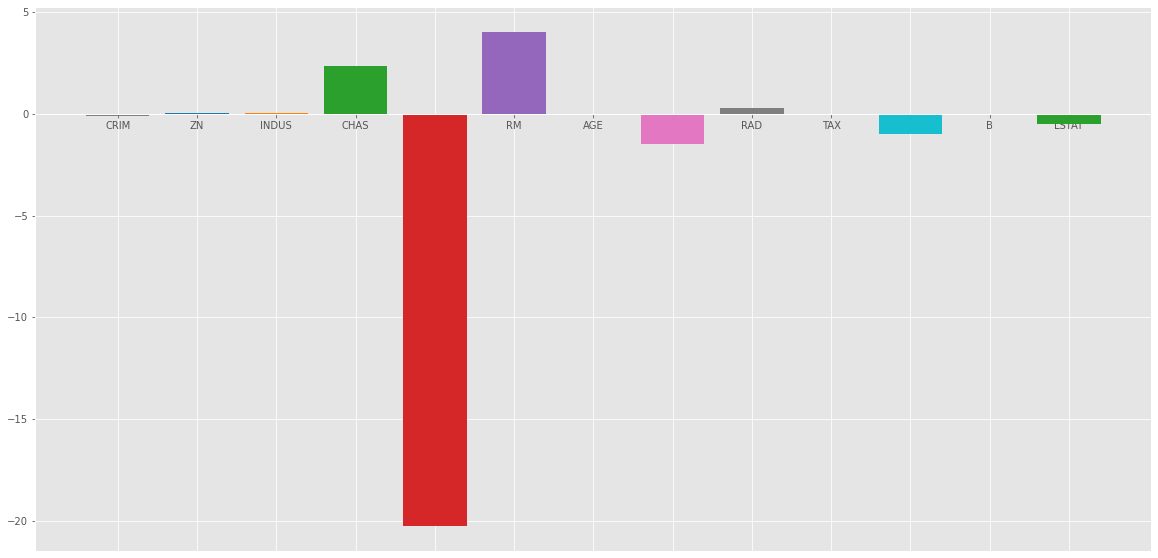

In [ ]:
#plotting the coefficient
fig, ax = plt.subplots(figsize = (20,10))

color = ['tab:grey', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple','tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient['Columns'], lreg_coefficient['Coefficient Estimate'], color = color)

ax.spines['bottom'].set_position('zero')


plt.style.use('ggplot')
plt.show()

In the linear model the NOX coefficient is effecting the linear equation highly. 

In [ ]:
#import ridge regression
from sklearn.linear_model import Ridge

#train the model
ridgeR = Ridge(alpha=1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

#calculate the mean square error----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('mean squared error on test set with reidge regression', mean_squared_error_ridge )

#get ridge coefficient and print them

ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns']= x_train.columns
ridge_coefficient['coefficient estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

mean squared error on test set with reidge regression 28.118425472964788
    Columns  coefficient estimate
0      CRIM             -0.095246
1        ZN              0.050452
2     INDUS              0.009755
3      CHAS              2.115141
4       NOX            -10.868318
5        RM              4.117530
6       AGE             -0.003983
7       DIS             -1.340825
8       RAD              0.268299
9       TAX             -0.013137
10  PTRATIO             -0.875316
11        B              0.007840
12    LSTAT             -0.506849


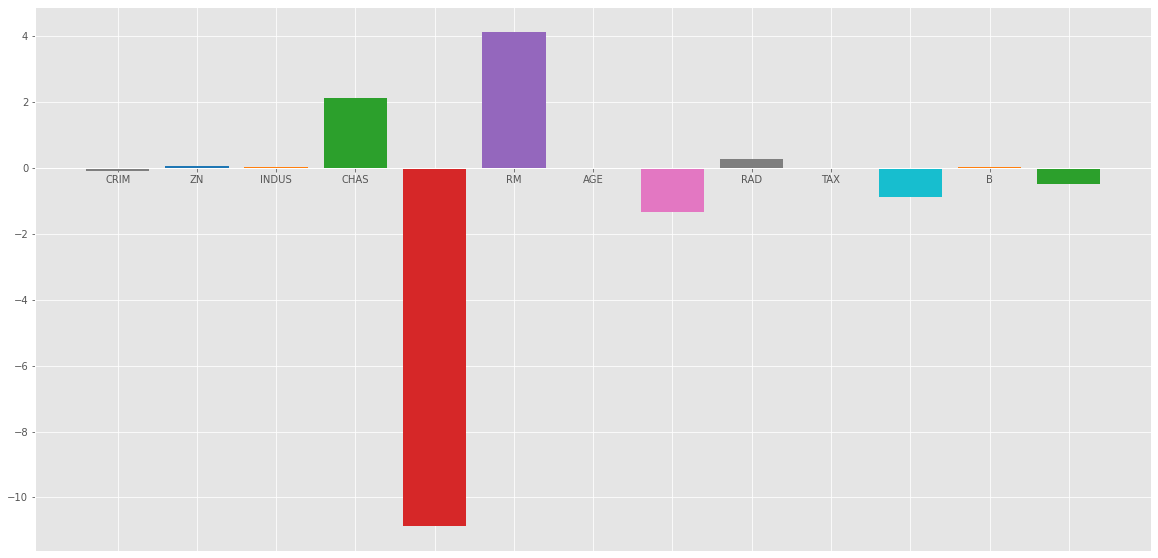

In [ ]:
#plotting the coefficient
fig, ax = plt.subplots(figsize = (20,10))

color = ['tab:grey', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple','tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient['Columns'], ridge_coefficient['coefficient estimate'], color = color)

ax.spines['bottom'].set_position('zero')


plt.style.use('ggplot')
plt.show()

The NOX coefficient value has decreased, which helps in decreasing the effect of a particular value on the equation.

In [ ]:
#import lasso regression
from sklearn.linear_model import Lasso

#train the model
lassoR = Lasso(alpha=1)
lassoR.fit(x_train, y_train)
y_pred = lassoR.predict(x_test)

#calculate the mean square error----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('mean squared error on test set with reidge regression', mean_squared_error_ridge )

#get ridge coefficient and print them

lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns']= x_train.columns
lasso_coefficient['coefficient estimate'] = pd.Series(ridgeR.coef_)
print(lasso_coefficient)

mean squared error on test set with reidge regression 31.69637334411355
    Columns  coefficient estimate
0      CRIM             -0.095246
1        ZN              0.050452
2     INDUS              0.009755
3      CHAS              2.115141
4       NOX            -10.868318
5        RM              4.117530
6       AGE             -0.003983
7       DIS             -1.340825
8       RAD              0.268299
9       TAX             -0.013137
10  PTRATIO             -0.875316
11        B              0.007840
12    LSTAT             -0.506849


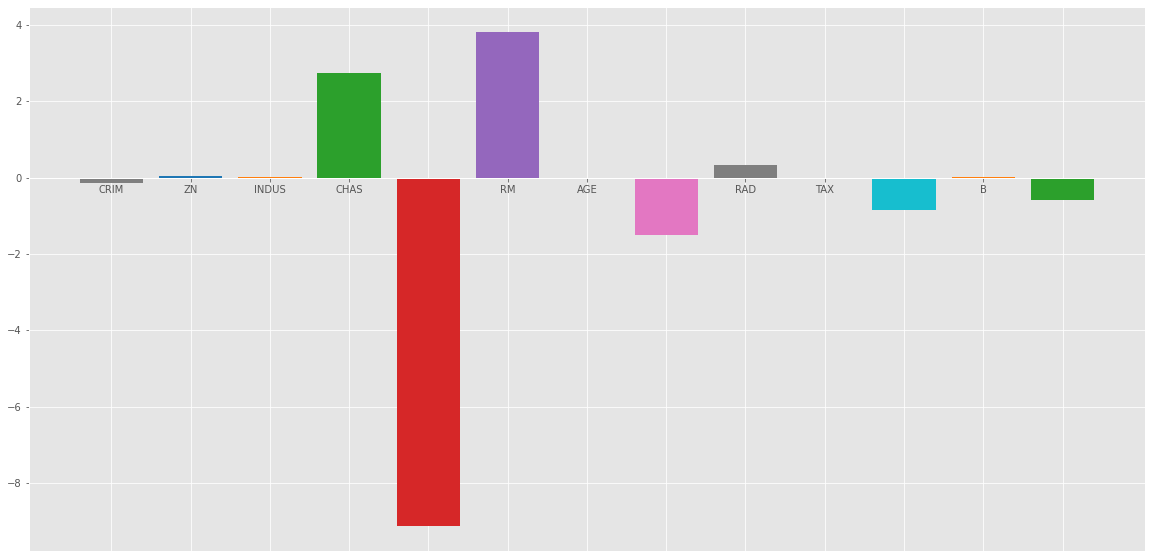

In [ ]:
#plotting the coefficient
fig, ax = plt.subplots(figsize = (20,10))

color = ['tab:grey', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple','tab:brown','tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coefficient['Columns'], lasso_coefficient['coefficient estimate'], color = color)

ax.spines['bottom'].set_position('zero')


plt.style.use('ggplot')
plt.show()